# Linear Regression

There are multiple ways to construct a linear regression model using python. Here I use [`scikit-learn`](http://scikit-learn.org/stable/index.html) to investigate linear relationships in the [housing dataset](http://nbviewer.jupyter.org/github/bhlmn/ds/blob/master/docs/ml/data/housing.ipynb).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the housing dataset
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
            'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(data_url, header=None, sep='\s+', names=colnames)

In [3]:
from sklearn.linear_model import LinearRegression
x = df[['RM']].values
y = df['MEDV'].values
lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
def lm_plot(x, y, model, xlab=None, ylab=None, main=None, size=(7,5), res=100, show=True, col_xy='grey', 
            col_lm='red', font='Arial', show_fit=True, fitloc='top_left'):
    fig, ax = plt.subplots(figsize=size, dpi=res, facecolor='white', edgecolor='k')
    ax.scatter(x, y, c=col_xy, edgecolors='#262626', alpha=0.5)
    ax.plot(x, model.predict(x), color=col_lm, alpha=0.75)
    
    # if we have axis labels
    if xlab != None:
        ax.set_xlabel(xlab, fontname=font)
    if ylab != None:
        ax.set_ylabel(ylab, fontname=font)
    if main != None:
        ax.set_title(main, fontname=font)
        
    # set font for tick marks
    # Set the font name for axis tick labels to be Comic Sans
    for tick in ax.get_xticklabels():
        tick.set_fontname(font)
    for tick in ax.get_yticklabels():
        tick.set_fontname(font)
        
    # remove top and right axes
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Show equation and R squared
    if show_fit:
        text_x, text_y = [0.15, 0.9]
        if fitloc == 'top_right':
            text_x, text_y = [0.85, 0.9]
        if fitloc == 'bottom_left':
            text_x, text_y = [0.15, 0.15]
        if fitloc == 'bottom_right':
            text_x, text_y = [0.85, 0.15]
        eq_text = 'y = %.2f + %.2fx' % (model.coef_[0], model.intercept_)
        if model.intercept_ < 0:
            eq_text = 'y = %.2f - %.2fx' % (model.coef_[0], abs(model.intercept_))
        plt.text(text_x, text_y, eq_text, ha='center', va='center', transform=ax.transAxes, fontname=font)
        from sklearn.metrics import r2_score
        r2_text = 'R^2 = %.3f' % r2_score(y, lm.predict(x))
        plt.text(text_x, text_y - 0.05, r2_text, ha='center', va='center', transform=ax.transAxes, fontname=font)

    if show:
        plt.show()
    return None

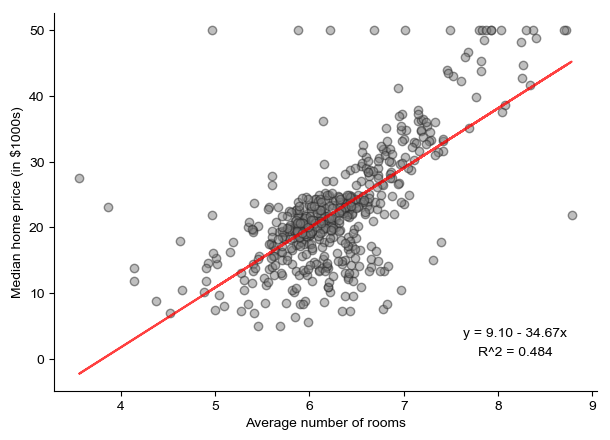

In [118]:
lm_plot(x, y, lm, xlab='Average number of rooms', ylab='Median home price (in $1000s)', fitloc='bottom_right')

# TODO from here ... make this plot look prettier!

In [99]:
from sklearn.metrics import r2_score
r2_score(y, lm.predict(x))

0.48352545599133423

In [105]:
text_x, text_y = [0.15, 0.9]
text_x

0.15